dict_keys(['images', 'actions', 'lane_cost', 'pixel_proximity_cost', 'states', 'proximity_cost', 'mask', 'frames', 'ego_car'])
Actions:  torch.Size([309, 2])
States:  torch.Size([309, 7, 4])
Costs:  torch.Size([309])
Images:  torch.Size([309, 3, 117, 24])
Frames:  (309,)


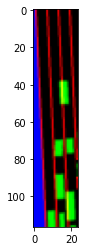

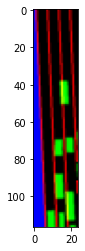

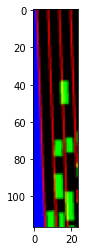

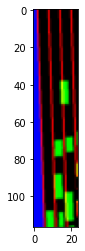

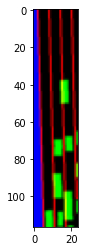

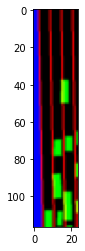

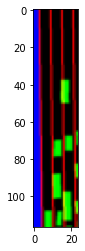

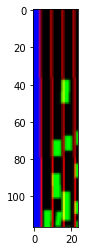

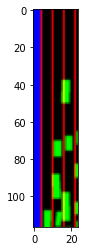

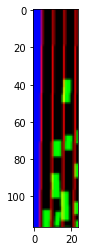

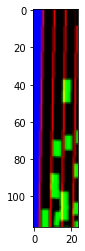

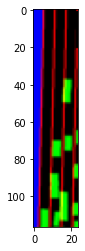

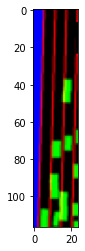

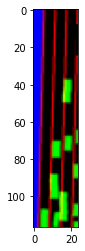

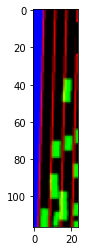

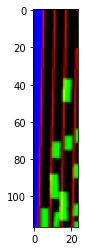

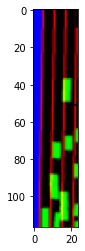

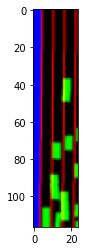

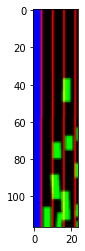

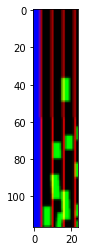

In [28]:
# load pickled data
import pickle
import torch
import matplotlib.pyplot as plt

fd = pickle.load(open('/workspace/traffic-data/state-action-cost/data_i80_v0/trajectories-0400-0415/car1.pkl', 'rb'))
print(fd.keys())
print('Actions: ',fd['actions'].shape)
print('States: ',fd['states'].shape)
print('Costs: ',fd['lane_cost'].shape)
print('Images: ',fd['images'].shape)
print('Frames: ',fd['frames'].shape)
fd['ego_car']
plt.imshow(fd['ego_car'].permute(1,2,0))
#show first 20 images with actions
for i in range(20):
    plt.imshow(fd['images'][i].permute(1,2,0))
    plt.show()
    

In [1]:
## test output of get_batch_fm
from dataloader import DataLoader
class DataSettings:
        debug = False
        batch_size = 4
        npred = 20
        ncond = 10
    # Instantiate data set object
d = DataLoader(None, opt=DataSettings, dataset='i80')
inputs, actions, targets, _, _ = d.get_batch_fm('train', 10)


[loading data from: /workspace/traffic-data/state-action-cost/data_i80_v0]
[loading data shard: /workspace/traffic-data/state-action-cost/data_i80_v0/trajectories-0400-0415/all_data.pth]
[loading data shard: /workspace/traffic-data/state-action-cost/data_i80_v0/trajectories-0515-0530/all_data.pth]
[loading data shard: /workspace/traffic-data/state-action-cost/data_i80_v0/trajectories-0500-0515/all_data.pth]
Number of episodes: 5596
[loading data splits: /workspace/traffic-data/state-action-cost/data_i80_v0/splits.pth]
[loading data stats: /workspace/traffic-data/state-action-cost/data_i80_v0/data_stats.pth]
[loading car sizes: /workspace/traffic-data/state-action-cost/data_i80_v0/car_sizes.pth]


In [8]:
print(actions.shape)
actions[1]

torch.Size([4, 10, 2])


tensor([[ 2.0396,  0.1864],
        [ 1.8923, -0.2078],
        [ 1.8872, -0.1943],
        [ 1.9878,  0.1635],
        [ 2.3784,  0.0189],
        [ 2.6241,  0.0286],
        [ 2.6319,  0.0260],
        [ 2.4327,  0.0304],
        [ 2.0292,  0.0872],
        [ 1.7501, -0.0492]], device='cuda:0')

In [7]:
print(inputs[0].shape)
print(inputs[1].shape)
print(inputs[2].shape)

torch.Size([4, 10, 3, 117, 24])
torch.Size([4, 10, 4])
torch.Size([4, 3, 117, 24])


In [9]:
print(targets[0].shape)
print(targets[1].shape)
print(targets[2].shape)

torch.Size([4, 10, 3, 117, 24])
torch.Size([4, 10, 4])
torch.Size([4, 10, 2])
